In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## EDA

In [6]:
df = pd.read_csv("heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [9]:
df.shape

(918, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.duplicated().sum()

0

<Axes: xlabel='HeartDisease'>

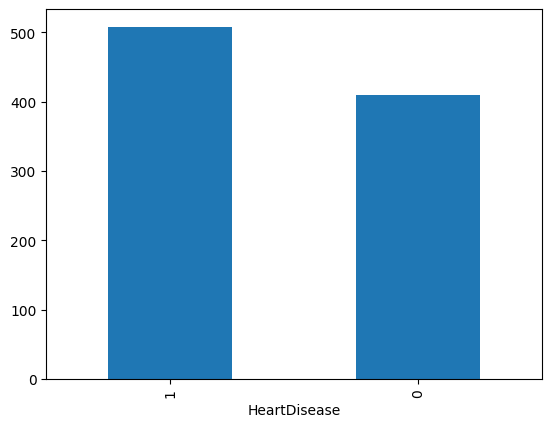

In [12]:
df['HeartDisease'].value_counts().plot(kind="bar")


In [13]:
df.isnull().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

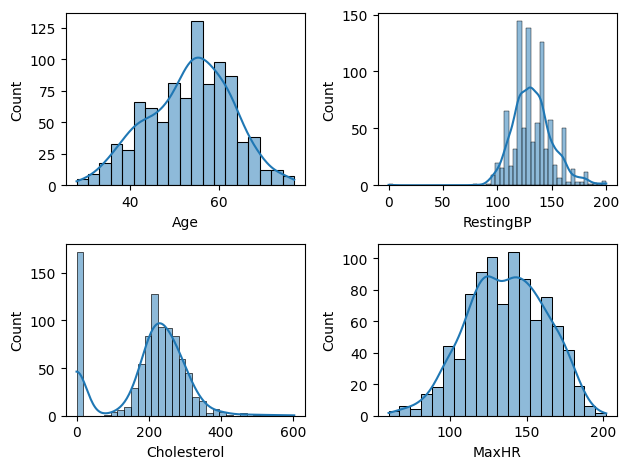

In [15]:
def plotting(var, num):
    plt.subplot(2,2,num)
    sns.histplot(df[var], kde=True)
    
plotting("Age",1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [19]:
cholesterol_mean = df.loc[df['Cholesterol'] != 0, 'Cholesterol'].mean()

df['Cholesterol'] = df['Cholesterol'].replace('0', cholesterol_mean)

df['Cholesterol'] = df['Cholesterol'].round(2)

In [20]:
resting_bp_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

df['RestingBP'] = df['RestingBP'].replace(0, resting_bp_mean)

df['RestingBP'] = df['RestingBP'].round(2)

<Axes: xlabel='Sex', ylabel='count'>

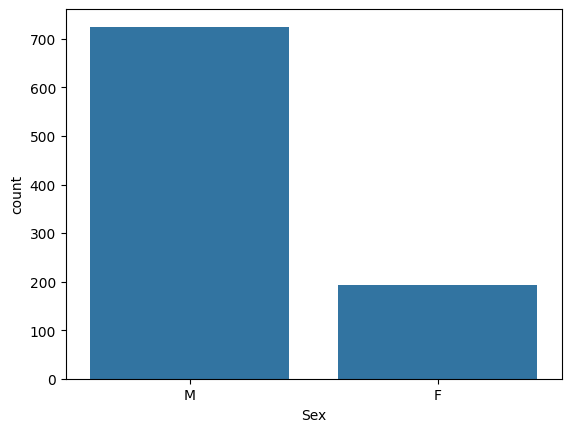

In [21]:
sns.countplot(x = df['Sex'])


<Axes: xlabel='ChestPainType', ylabel='count'>

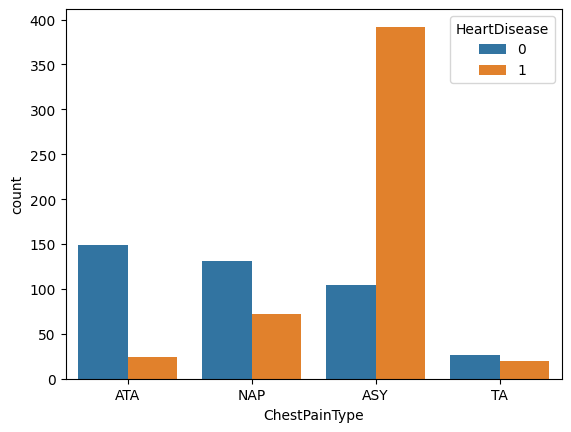

In [22]:
sns.countplot(x = df['ChestPainType'],hue = df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

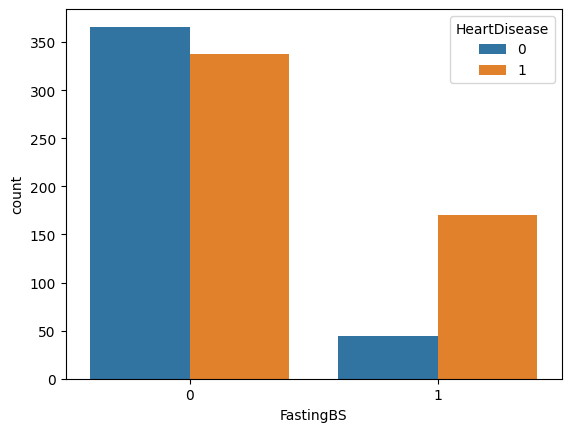

In [23]:
sns.countplot(x = df['FastingBS'],hue = df['HeartDisease'])


<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

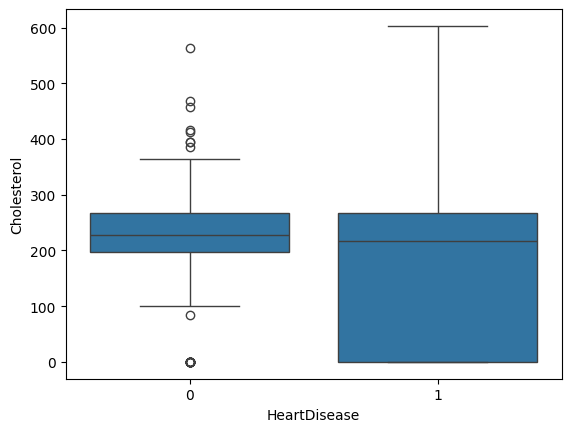

In [25]:
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

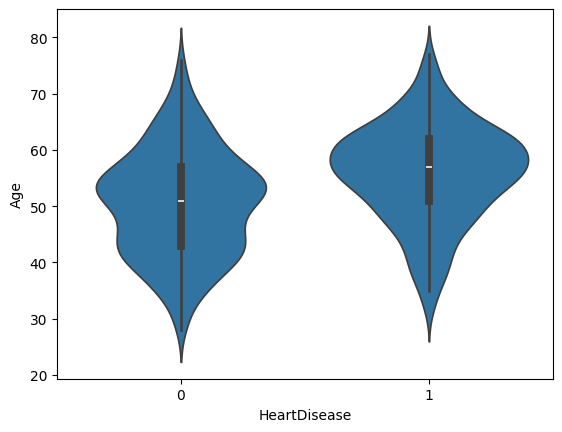

In [26]:
sns.violinplot(x='HeartDisease', y='Age', data=df)


<Axes: >

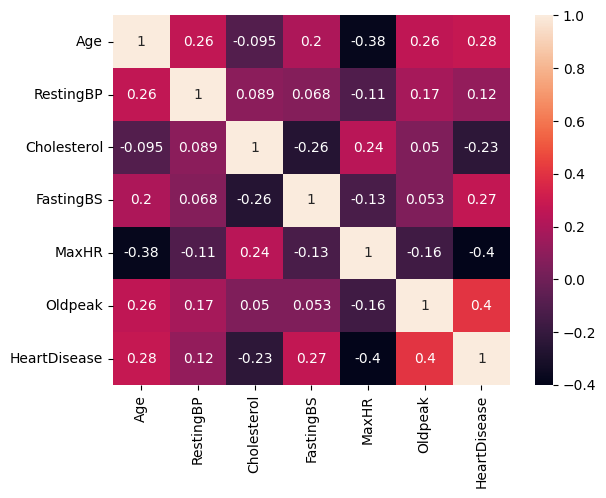

In [27]:
sns.heatmap(df.corr(numeric_only=True), annot=True)


## Data preprocessing and cleaning

In [29]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138.0,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150.0,195,0,Normal,122,N,0.0,Up,0


In [30]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [31]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138.0,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150.0,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144.0,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130.0,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130.0,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


In [32]:
df_encoded = df_encoded.astype(int)


In [33]:
df_encoded.columns


Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [35]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (RBF Kernel)": SVC(probability=True)
}

In [39]:
results = []

In [40]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [41]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.8859, 'F1 Score': 0.9005},
 {'Model': 'KNN', 'Accuracy': 0.8859, 'F1 Score': 0.8995},
 {'Model': 'Naive Bayes', 'Accuracy': 0.913, 'F1 Score': 0.9208},
 {'Model': 'Decision Tree', 'Accuracy': 0.7554, 'F1 Score': 0.7867},
 {'Model': 'SVM (RBF Kernel)', 'Accuracy': 0.8967, 'F1 Score': 0.91}]

In [42]:
import pickle
import joblib
joblib.dump(models['KNN'],'KNN_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(X.columns.tolist(),'columns.pkl')

['columns.pkl']